# Film Casus

In dit notebook gaan we naar de filmdataset kijken. Onze onderzoek vraag luidt:

In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDBWe gaan later de dataset nog uitbreiden door er een nieuwe dataset bij toe te voegen en een nieuwe onderzoek vraag te verzinnen.
Maar voor nu focussen we op de eeste vraag. Let's Begin!

# Data Understanding
?


In [20]:
import numpy as np 
import pandas as pd
from scipy import stats 
from IPython.display import Image, display
import matplotlib.pyplot as plt

In [2]:
filmdb = pd.read_csv('movie-1.csv')

De database is correct ingeladen laten we dieper kijken welke colummen we hebben om mee te werken.

In [3]:
filmdb.head(5)

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [11]:
filmdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
filmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Meetniveau's van alle tabellen

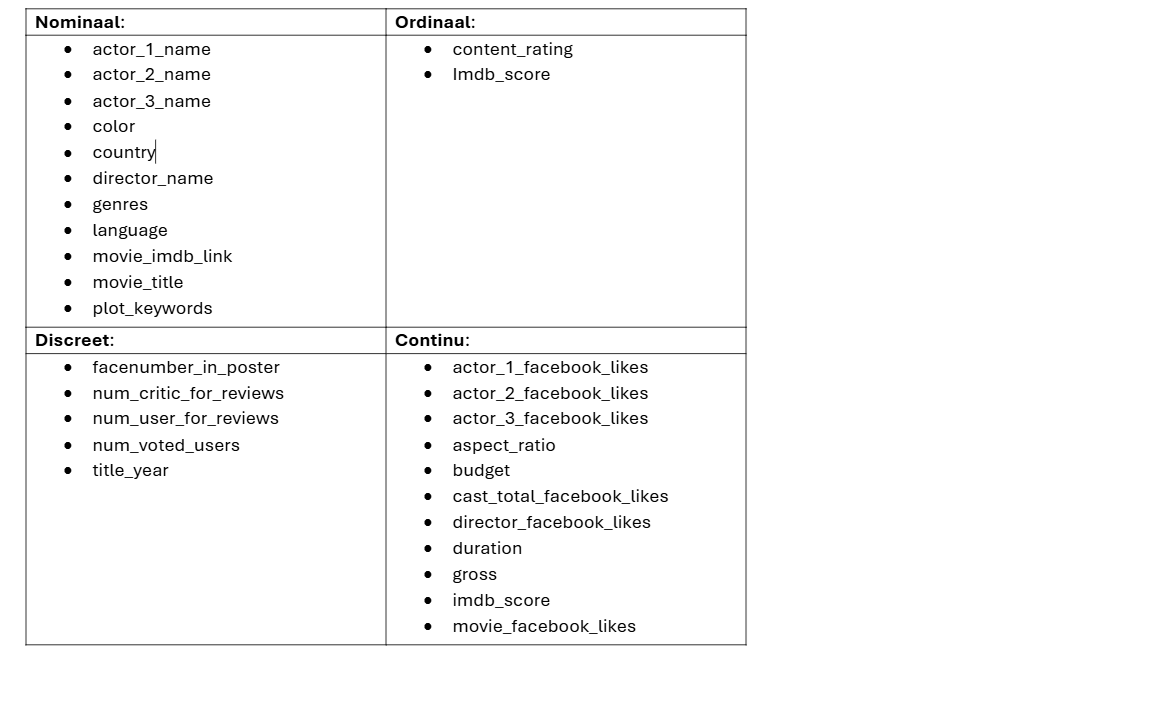

In [9]:
display(Image(filename="meet.png"))

## Feature and target variables

Voor feature variables gaan we een paar tabellen analyseren. De target variabel is al gegeven, namelijk de Gross column.
De gross is afhankelijk van de feature variables, die zijn onafhankelijk.

In [13]:
feature_vars = [
       'director_facebook_likes',
       'actor_1_facebook_likes',
       'num_voted_users', 
       'cast_total_facebook_likes', 
       'num_user_for_reviews',
       'imdb_score',
       'gross']
target_var = ['gross']

In [14]:
filmdb[feature_vars].describe()

director_facebook_likes  actor_1_facebook_likes  num_voted_users  \
count              4939.000000             5036.000000     5.043000e+03   
mean                686.509212             6560.047061     8.366816e+04   
std                2813.328607            15020.759120     1.384853e+05   
min                   0.000000                0.000000     5.000000e+00   
25%                   7.000000              614.000000     8.593500e+03   
50%                  49.000000              988.000000     3.435900e+04   
75%                 194.500000            11000.000000     9.630900e+04   
max               23000.000000           640000.000000     1.689764e+06   

       cast_total_facebook_likes  num_user_for_reviews   imdb_score  \
count                5043.000000           5022.000000  5043.000000   
mean                 9699.063851            272.770808     6.442138   
std                 18163.799124            377.982886     1.125116   
min                     0.000000              1.000000     1.600000   
25%                  1411.000000             65.000000     5.800000   
50%                  3090.000000            156.000000     6.600000   
75%                 13756.500000            326.000000     7.200000   
max                656730.000000           5060.000000     9.500000   

              gross  
count  4.159000e+03  
mean   4.846841e+07  
std    6.845299e+07  
min    1.620000e+02  
25%    5.340988e+06  
50%    2.551750e+07  
75%    6.230944e+07  
max    7.605058e+08

### Beschrijving variables

#### director_facebook_likes (Facebook likes voor de regisseur):

Aantal waarden: 4939
Gemiddelde: 686,51 likes
Standaarddeviatie: 2813,33 (grote variatie in likes)
Minimum: 0 likes
25e percentiel: 7 likes (25% van de regisseurs heeft 7 of minder likes)
Mediaan (50e percentiel): 49 likes
75e percentiel: 194,5 likes
Maximum: 23000 likes

#### actor_1_facebook_likes (Facebook likes voor de hoofdacteur):

Aantal waarden: 5036
Gemiddelde: 6560,05 likes
Standaarddeviatie: 15020,76
Minimum: 0 likes
25e percentiel: 614 likes
Mediaan: 988 likes
75e percentiel: 11000 likes
Maximum: 640000 likes (enorm verschil met andere waarden)

#### num_voted_users (Aantal gebruikersstemmen op IMDb):

Aantal waarden: 5043
Gemiddelde: 83668,16 stemmen
Standaarddeviatie: 138485,3
Minimum: 5 stemmen
25e percentiel: 8593,5 stemmen
Mediaan: 34359 stemmen
75e percentiel: 96309 stemmen
Maximum: 1689764 stemmen

#### cast_total_facebook_likes (Totaal aantal Facebook likes voor de cast):

Aantal waarden: 5043
Gemiddelde: 9699,06 likes
Standaarddeviatie: 18163,8
Minimum: 0 likes
25e percentiel: 1411 likes
Mediaan: 3090 likes
75e percentiel: 13756,5 likes
Maximum: 656730 likes

#### num_user_for_reviews (Aantal gebruikersreviews op IMDb):

Aantal waarden: 5022
Gemiddelde: 272,77 reviews
Standaarddeviatie: 377,98
Minimum: 1 review
25e percentiel: 65 reviews
Mediaan: 156 reviews
75e percentiel: 326 reviews
Maximum: 5060 reviews

#### imdb_score (IMDb score):

Aantal waarden: 5043
Gemiddelde: 6,44
Standaarddeviatie: 1,13
Minimum: 1,6
25e percentiel: 5,8
Mediaan: 6,6
75e percentiel: 7,2
Maximum: 9,5

#### gross (Bruto-opbrengst):

Aantal waarden: 4159
Gemiddelde: 48,47 miljoen USD
Standaarddeviatie: 68,45 miljoen USD
Minimum: 162 USD
25e percentiel: 5,34 miljoen USD
Mediaan: 25,52 miljoen USD
75e percentiel: 62,31 miljoen USD
Maximum: 760,51 miljoen USD

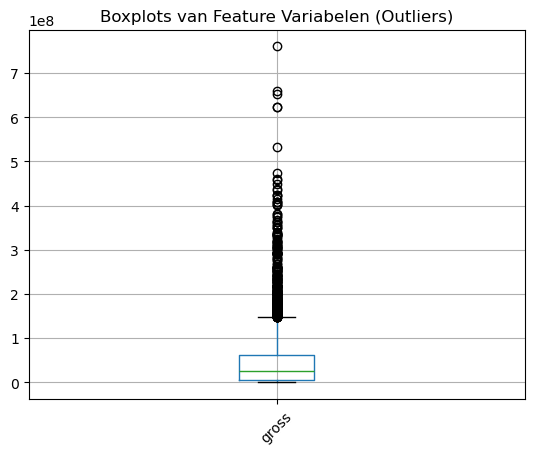

In [23]:
### Outliers visueel maken

filmdb[target_var].boxplot()

# Toon de plot
plt.xticks(rotation=45)
plt.title('Boxplots van Feature Variabelen (Outliers)')
plt.show()


Aanzienlijk veel outliers. We gaan later kijken wat we hiermee kunnen doen. Voor nu hebben een een goed begrip van de data.
Laten we kijken naar missing values en de data opschonen.

### Missing values

We zien dat gross bijna een vijfde van z'n data mist. We gaan hiervoor een oplossing moeten bedenken. Voor nu verwijderen we de empty values en de outliers.

In [26]:
filmdb[feature_vars].isnull().sum()

director_facebook_likes      104
actor_1_facebook_likes         7
num_voted_users                0
cast_total_facebook_likes      0
num_user_for_reviews          21
imdb_score                     0
gross                        884
dtype: int64

# Data Preperation

In [30]:
cleaned_data = filmdb[feature_vars].dropna()

# Bepaal Q1 en Q3
Q1 = filmdb[feature_vars].quantile(0.25)
Q3 = filmdb[feature_vars].quantile(0.75)

# Bereken de IQR
IQR = Q3 - Q1

# Verwijder outliers voor elke feature (ookal hebben we nu alleen gross. 
# Deze functie kan van pas komen mochten we andere tabellen willen controleren later)
# Filter de outliers weg op basis van de 1.5 * IQR regel

for feature in feature_vars:
    # Bereken de grenzen voor outliers
    lower_bound = Q1[feature] - 1.5 * IQR[feature]
    upper_bound = Q3[feature] + 1.5 * IQR[feature]
    
    # Verwijder de outliers
    clean_filmdb = filmdb[(filmdb[feature] >= lower_bound) & (filmdb[feature] <= upper_bound)]

clean_filmdb[feature_vars].isnull().sum()

director_facebook_likes      3
actor_1_facebook_likes       4
num_voted_users              0
cast_total_facebook_likes    0
num_user_for_reviews         1
imdb_score                   0
gross                        0
dtype: int64

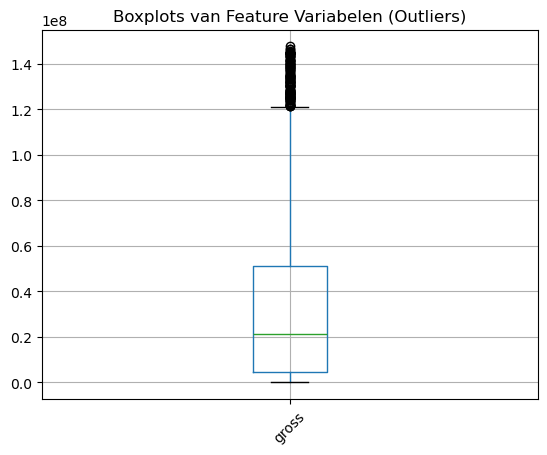

In [31]:
clean_filmdb[target_var].boxplot()

# Toon de plot
plt.xticks(rotation=45)
plt.title('Boxplots van Feature Variabelen (Outliers)')
plt.show()